In [16]:
import pandas as pd
import numpy as np
import geonamescache
import unidecode
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [37]:
train_df = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')
df = train_df.copy()
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [33]:
# Analyze missing values in Location against each sentiment
missing_values = df.groupby('Sentiment')['Location'].apply(lambda x: x.isnull().sum())
print(missing_values)

Sentiment
Extremely Negative    1232
Extremely Positive    1351
Negative              2154
Neutral               1541
Positive              2312
Name: Location, dtype: int64


In [34]:
df.groupby('Sentiment')['Location'].value_counts()

Sentiment           Location              
Extremely Negative  London, England           81
                    London                    74
                    United States             64
                    Washington, DC            52
                    United Kingdom            47
                                              ..
Positive            Arlington, Virginia        1
                    Around the Globe           1
                    Pining for the Fijords     1
                    Arusha, Tanzania           1
                    Ã  l'Ã©chelle mondiale     1
Name: count, Length: 16755, dtype: int64

In [35]:
print(df['Location'].value_counts())

Location
London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: count, Length: 12220, dtype: int64


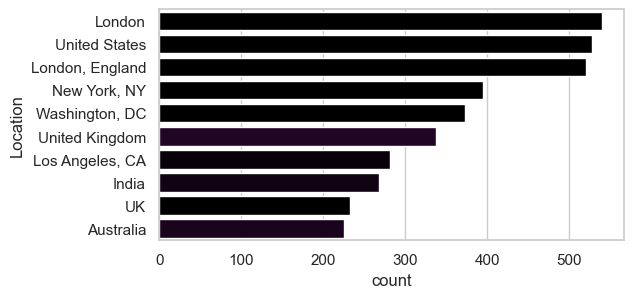

In [42]:
plt.figure(figsize=(6,3))
sns.countplot(y='Location', hue='Location', data=train_df, order = train_df['Location'].value_counts().iloc[:10].index, palette='nipy_spectral', orient='h', legend=False)
plt.show()

In [44]:
import geonamescache

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
    
def create_city_map():
    gc = geonamescache.GeonamesCache()
    data = gc.get_cities()
  
    code_city_map = dict()
    for each in data:
        country_code = data[each]['countrycode']
        city_name = data[each]['name'].lower()
        alternate_names = data[each]['alternatenames']
        city_name = strip_accents(city_name)
        
        stripped_alternate_names = []
        for name in alternate_names:
            name = strip_accents(name)
            stripped_alternate_names.append(name.lower())
        alternate_names = stripped_alternate_names

        if country_code not in code_city_map:
            code_city_map[country_code] = [city_name]
            code_city_map[country_code].extend(alternate_names)
        else:
            code_city_map[country_code].append(city_name)

    return code_city_map, data

code_city_map, data = create_city_map()
code_city_map['US']

['fort hunt',
 '',
 'bessemer',
 'paducah',
 'birmingham',
 'cordova',
 'center point',
 'cullman',
 'daphne',
 'decatur',
 'dothan',
 'east florence',
 'enterprise',
 'fairhope',
 'florence',
 'foley',
 'gadsden',
 'helena',
 'homewood',
 'hoover',
 'hueytown',
 'huntsville',
 'madison',
 'millbrook',
 'mobile',
 'montgomery',
 'mountain brook',
 'northport',
 'opelika',
 'oxford',
 'pelham',
 'phenix city',
 'prattville',
 'prichard',
 'selma',
 'talladega',
 'tillmans corner',
 'troy',
 'trussville',
 'tuscaloosa',
 'vestavia hills',
 'bella vista',
 'benton',
 'bentonville',
 'bryant',
 'cabot',
 'conway',
 'el dorado',
 'fayetteville',
 'fort smith',
 'hot springs',
 'jacksonville',
 'jonesboro',
 'little rock',
 'maumelle',
 'north little rock',
 'paragould',
 'pine bluff',
 'rogers',
 'russellville',
 'searcy',
 'siloam springs',
 'springdale',
 'texarkana',
 'van buren',
 'west memphis',
 'adams morgan',
 'shaw',
 'washington',
 'bear',
 'dover',
 'middletown',
 'newark',
 'wil

In [25]:
import re
import unicodedata

def strip_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if unicodedata.category(c) != 'Mn')
df['Location'] = df['Location'].astype('str')
df['Location'] = df['Location'].apply(lambda x:x.lower() if pd.notnull(x) else x )
df['Location'] = df['Location'].apply(lambda x:(x.split(',')[0]).lower() if pd.notnull(x) else x )
df['Location'] = df['Location'].apply(lambda x: x if re.match(r'[a-z]', x) else np.nan)
df.replace([' ', 'N/a', 'nan'], np.nan, inplace=True)
df.Location = df.Location.fillna('unknown')
df['Location'] = df['Location'].astype('str')
df['Location'] = df['Location'].apply(strip_accents)
df.Location = df.Location.fillna('unknown')
print(df['Location'])
print(df['Location'].value_counts())

0                              london
1                                  uk
2                           vagabonds
3                             unknown
4                             unknown
                     ...             
41152                 wellington city
41153                         unknown
41154                         unknown
41155                         unknown
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object
Location
unknown                          9565
london                           1264
new york                          713
united states                     532
washington                        507
                                 ... 
reseda                              1
mid yell                            1
views don't reflect employers       1
uganda kampala                      1
i love you so much || he/him        1
Name: count, Length: 8709, dtype: int64


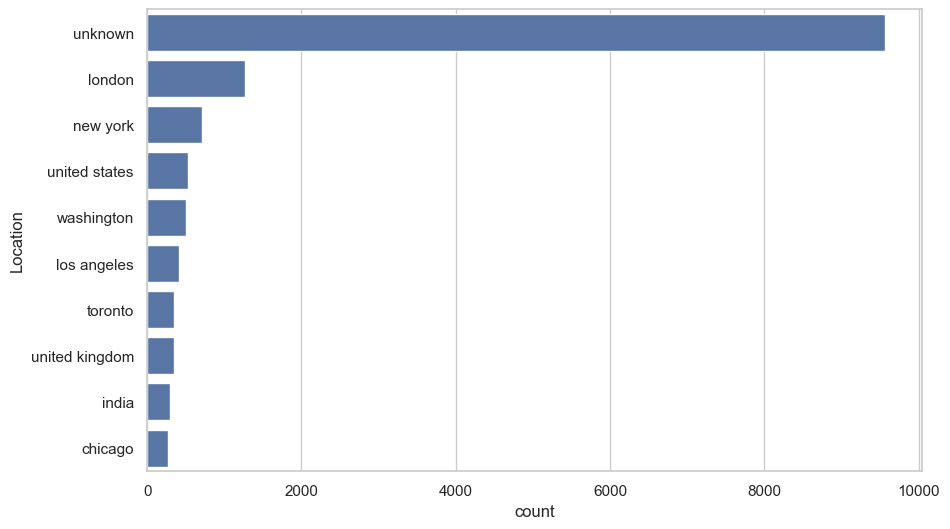

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y='Location', data=df, order = df['Location'].value_counts().iloc[:10].index)
plt.show()

<Axes: ylabel='count'>

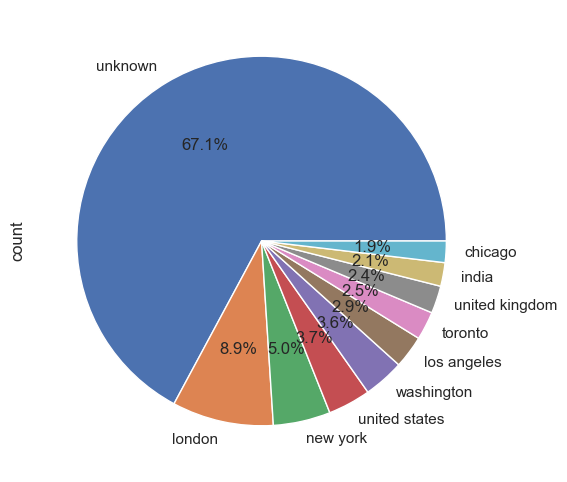

In [27]:
 # Plot the pie chart
plt.figure(figsize=(10,6))
df['Location'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

#### This pie chart excludes several Location fields with strange texts and statements, so after cleaning them up, additional rows will be pushed to an unknown location. 
#### Removing the gibirish text from the Location Field can be extremely time-consuming and labor-intensive. 
### Thus, cleaning up the location does not appear to be worthwhile.

## Also We can see that majority of the tweets have unknown location  So this field might not add much value

### =============More Exploration Required============